In [1]:
import os
from fs_solver import *
#from FsSolver import *

Libraries fetched!...



In [2]:

########### Trick: Kør først gang med max_iter_fs = 0, næste gang kører hurtigere ###########

kwargs = {"ylim":[-4,1.5], "xlim":[-13,13], "V_inf": 10, "g_div": 70, "write":True,
           "n_airfoil": 50,
           "n_fs": 100,
           "n_bed": 20,
           "n_inlet": 10,
           "n_outlet": 10,
           "rtol": 1e-8,
           "fs_rtol": 1e-2,
           "max_iter_fs": 7, 
           "dt": 1e-2,
           "a":1, "b":1,
           "damping":0.2}
FS = FsSolver("0012", alpha = 10, P=3, kwargs = kwargs)
#PFS = PotentialFlowSolver("0012", alpha = 10, P=4, kwargs=kwargs)

In [3]:
FS.solve()
#PFS.solve()

[0.0498296  0.28259773]
[ 8.67245368 -1.52922262]
PoissonSolver stagnated in 6 iterations
	 Total time: 3.8423779010772705
	 dGamma: 6.38585040858944e-08
	 dot product: -9.903448450170338e-06


initialization done
The height at the beginning of the boundary is:  1.5
[0.0498296  0.28259773]
[-9.26791066  1.6341849 ]
PoissonSolver converged in 11 iterations
	 Total time: 7.561393976211548
	 dGamma: 1.816784774775064e-07
	 dot product: 6.207934578255557e-07


	 iteration: 1
	 residual norm 9.012238918248983e-06
	 iteration time: 7.926560640335083

The height at the beginning of the boundary is:  1.5
[0.0498296  0.28259773]
[-15.94857896   2.81216568]
PoissonSolver converged in 18 iterations
	 Total time: 11.337254285812378
	 dGamma: 1.2580782107444173e-05
	 dot product: 2.558419071807918e-07


	 iteration: 2
	 residual norm 0.378138147857793
	 iteration time: 11.663013935089111

The height at the beginning of the boundary is:  1.5
PoissonSolver diverged in 0 iterations
	 Total time: 0.763

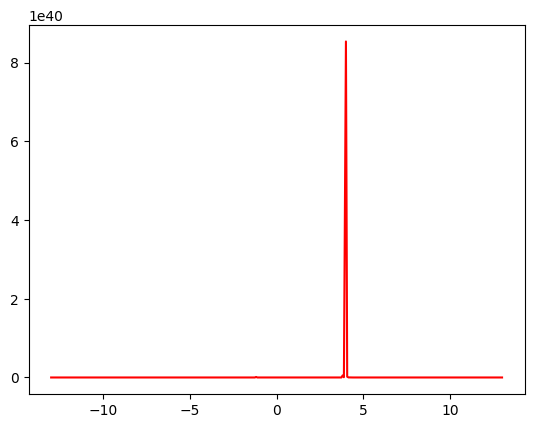

In [4]:
plt.plot(FS.fs_points[:, 0], FS.PhiTilde, 'r-', label='FS points')

In [5]:
plt.plot(FS.fs_points[:,0], FS.etas[9])

IndexError: list index out of range

In [ ]:
model = FS.model
# Mesh and function spaces
number_of_points = FS.fs_points.shape[0]
fs_mesh = fd.IntervalMesh(number_of_points-1, FS.xlim[0], FS.xlim[1])
V_eta = fd.FunctionSpace(fs_mesh, "CG", 1)
V_phi = fd.FunctionSpace(fs_mesh, "CG", 1)

# Defining unknown functions
W = V_eta * V_phi
eta_phi = fd.Function(W)
eta, phi = fd.split(eta_phi)
psi, zeta = fd.TestFunctions(W)

# Defining known functions
phi_n = fd.Function(V_phi)
eta_n = fd.Function(V_eta)
w_n = fd.Function(V_phi)
velocity = np.array(model.velocity.at(FS.fs_points))

phi_n.dat.data[:] = FS.PhiTilde
eta_n.dat.data[:] = FS.fs_points[:, 1]
w_n.dat.data[:] = velocity[:, 1]

g = fd.Constant(9.81)
dt = fd.Constant(0.01)

grad_eta = fd.grad(eta)
grad_phi = fd.grad(phi) + w_n * fd.grad(eta)

F1 = (fd.inner((eta - eta_n)/dt, psi) * fd.dx +
      fd.inner(fd.dot(grad_eta, grad_phi), psi) * fd.dx -
      fd.inner(w_n * (1 + fd.dot(grad_eta, grad_eta)), psi) * fd.dx
      )

F2 = (fd.inner((phi - phi_n)/dt, zeta) * fd.dx +
      fd.inner(g*eta, zeta)* fd.dx +
      fd.Constant(0.5) * 
      fd.inner(fd.dot(grad_phi, grad_phi) - 
               w_n**2 * (fd.Constant(1) + fd.dot(grad_eta, grad_eta)), zeta) * fd.dx
      )

F = F1 + F2

solver_params = {"newton_solver": {"relative_tolerance": 1e-6,}}
fd.solve(F == 0, eta_phi, solver_parameters=solver_params)

eta_n.assign(eta_phi.sub(0))
phi_n.assign(eta_phi.sub(1))

ConvergenceError: Nonlinear solve failed to converge after 7 nonlinear iterations.
Reason:
   DIVERGED_DTOL

In [ ]:
plt.plot(FS.fs_points[:, 0], eta_phi.sub(0).dat.data[:], 'r-', label='eta_n')
plt.plot(FS.fs_points[:, 0], eta_n.dat.data[:], 'b-.', label='eta_n')

NameError: name 'eta_phi' is not defined